# Algoritmo PCA

El algoritmo PCA (Análisis de Componentes Principales) permite encontrar una representación de baja dimensionalidad $\mathbf{y_i}$ que explica la varianza de los datos originales $\mathbf{x_i}$. 

\begin{align*}
\mathbf{y_i}=U^T (\mathbf{x_i}-\mu)\\
\tilde{\mathbf{x_i}}=U \mathbf{y_i} +\mu
\end{align*}

In [11]:
using LinearAlgebra; 
using MultivariateStats;
using Statistics;

X=[ 7  4  3;
    4  1  8; 
    6  3  5;
    8  6  1;
    8  5  7;
    7  2  9;
    5  3  3;
    9  5  8;
    7  4  5;
    8  2  2];
μ=mean!([1. 1. 1.],X)
X_m=(X.-μ)
M = fit(PCA, transpose(X_m),maxoutdim=3)
Yte = transform(M, transpose(X_m))
X_r=transpose(reconstruct(M, Yte)).+μ
E=norm(X-X_r)

2.7733362266239673e-15

In [12]:
M

PCA(indim = 3, outdim = 3, principalratio = 1.0)

Pattern matrix (unstandardized loadings):
──────────────────────────────────
         PC1       PC2         PC3
──────────────────────────────────
1  -0.395715  1.34028   -0.607685
2  -0.720434  1.26714    0.612646
3   2.75651   0.523582   0.0728826
──────────────────────────────────

Importance of components:
────────────────────────────────────────────────────────
                                PC1       PC2        PC3
────────────────────────────────────────────────────────
SS Loadings (Eigenvalues)  8.27394   3.67613   0.749928
Variance explained         0.651492  0.289459  0.0590495
Cumulative variance        0.651492  0.940951  1.0
Proportion explained       0.651492  0.289459  0.0590495
Cumulative proportion      0.651492  0.940951  1.0
────────────────────────────────────────────────────────

In [13]:
typeof(X_m)

Matrix{Float64} (alias for Array{Float64, 2})

In [14]:
values,vectors=eigen(cov(X_m));

In [15]:
U=[vectors[:,3] vectors[:,2]]
V=sort(values[2:3],rev=true)
U_s=sqrt.(V)'.*U

3×2 Matrix{Float64}:
 -0.395715  -1.34028
 -0.720434  -1.26714
  2.75651   -0.523582

In [16]:
U

3×2 Matrix{Float64}:
 -0.137571  -0.699037
 -0.25046   -0.660889
  0.958303  -0.27308

In [17]:
M.prinvars

3-element Vector{Float64}:
 8.273942580407862
 3.6761292667973366
 0.7499281527948027

In [18]:
V

2-element Vector{Float64}:
 8.273942580407862
 3.6761292667973366

In [19]:
M.proj

3×3 Matrix{Float64}:
 -0.137571  -0.699037   0.701727
 -0.25046   -0.660889  -0.707457
  0.958303  -0.27308   -0.0841616

In [20]:
imp=V./sum(V)
print("Proportion explained : $imp")

Proportion explained : [0.6923759694669046, 0.3076240305330955]

In [21]:
Y_t=transpose(U)*transpose(X_m)
X_r2=transpose(U*Y_t).+μ

10×3 Matrix{Float64}:
 7.07496  3.92443   2.99101
 4.35819  0.638889  7.95704
 6.18905  2.8094    4.97733
 8.4573   5.53896   0.945154
 8.31521  4.68222   6.9622
 6.43642  2.56818   9.06759
 5.56336  2.43204   2.93243
 8.88185  5.11912   8.01417
 7.19307  3.80535   4.97684
 6.53059  3.48141   2.17623

In [22]:
transpose(U)

2×3 transpose(::Matrix{Float64}) with eltype Float64:
 -0.137571  -0.25046    0.958303
 -0.699037  -0.660889  -0.27308

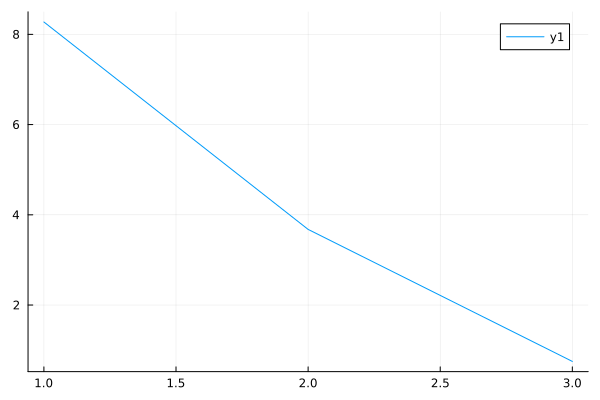

In [23]:
using Plots;

plot(sort(values,rev=true))

In [24]:
norm(X-X_r)

2.7733362266239673e-15

# EigenFaces

En el caso del reconocimiento facial, el algoritmo Eigenfaces utiliza esta representación de baja dimensionalidad para comparar caras nuevas (no utilizadas para ajustar los valores y vectores propios). Sin embargo, una de los problemas al utlizar esta técnica es determinar la dimensionalidad \emph{intrinsica} de los datos. Esto quiere decir que el número de componentes principales es desconocido y debe determinarse mediante un compromiso entre el error de reconstrucción $E=\sum_i^n (\mathbf{x_i}-\tilde{\mathbf{x_i}})^2$ y la capacidad de comprimir y explicar los datos.

https://bio322.epfl.ch/notebooks/pca.html

In [25]:
using Images,Colors
using ImageTransformations

path="eigenvalue_pics/"
dim=64

function images_to_mat(pathlist,dim,data_type)
    mat=zeros(data_type,length(pathlist),dim*dim)
    for (index,images) in enumerate(pathlist)
        img=load(images)
        img_g=Gray.(img)
        img_g=imresize(img_g,dim,dim)
        img_g=data_type.(img_g)
        img_g=reshape(img_g,(1,dim*dim))
        mat[index,:]=img_g
    end 
    return mat
end



ArgumentError: ArgumentError: Package Images not found in current path.
- Run `import Pkg; Pkg.add("Images")` to install the Images package.

In [26]:
pathlist=[]
names=[]
for d in readdir(path)
    for f in readdir(path*d)
        file_path=path*d*"/"*f
        push!(pathlist,file_path)
        push!(names,d)
    end 
end 

UndefVarError: UndefVarError: `path` not defined in `Main`
Suggestion: check for spelling errors or missing imports.
Hint: a global variable of this name may be made accessible by importing DataStructures in the current active module Main
Hint: a global variable of this name also exists in GR.

In [27]:
using LinearAlgebra; 
using MultivariateStats;
using Statistics;

my_type=Float64
mat=images_to_mat(pathlist,dim,my_type)
mean_face=mean!(transpose(ones(dim*dim)),mat)
centered_mat=mat.-my_type.(mean_face);

UndefVarError: UndefVarError: `images_to_mat` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [28]:
values,vectors=eigen(cov(centered_mat));

UndefVarError: UndefVarError: `centered_mat` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [29]:
typeof(vectors)

Matrix{Float64} (alias for Array{Float64, 2})

In [30]:
sorted_values=sort(values,rev=true);

In [31]:
length(sorted_values)

3

In [32]:
using Plots;

sorted_values=sorted_values./sum(sorted_values)
plot(sorted_values[1:100],lw=3)

BoundsError: BoundsError: attempt to access 3-element Vector{Float64} at index [1:100]

In [33]:
size(vectors)

(3, 3)

In [34]:
num_components=25

25

In [35]:
eigenfaces=vectors[:,dim*dim:-1:(dim*dim-num_components+1)];

UndefVarError: UndefVarError: `dim` not defined in `Main`
Suggestion: check for spelling errors or missing imports.
Hint: a global variable of this name may be made accessible by importing PDMats in the current active module Main
Hint: a global variable of this name may be made accessible by importing Distributions in the current active module Main

In [36]:
size(eigenfaces)

UndefVarError: UndefVarError: `eigenfaces` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [37]:
P=transpose(eigenfaces)*transpose(centered_mat);

UndefVarError: UndefVarError: `eigenfaces` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [38]:
size(mat)

UndefVarError: UndefVarError: `mat` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [39]:
size(P)

UndefVarError: UndefVarError: `P` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

# Error de predicción

In [40]:
img=load("test.jpg")
img_g=Gray.(img)
img_g=imresize(img_g,dim,dim)

UndefVarError: UndefVarError: `load` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [41]:
x_i=reshape(my_type.(img_g),(1,dim*dim))-mean_face
P_i=transpose(eigenfaces)*transpose(x_i);

UndefVarError: UndefVarError: `img_g` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [42]:
size(eigenfaces)

UndefVarError: UndefVarError: `eigenfaces` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [43]:
eigenfaces

UndefVarError: UndefVarError: `eigenfaces` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [44]:
dist=[]
for i in 1:22
    push!(dist,norm(P[:,i]-P_i))
end
pred=names[argmin(dist)]
print("La persona es : $pred")

UndefVarError: UndefVarError: `P` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

# Cuantización

In [45]:
function quantization(x, s, z, alpha_q, beta_q)
    x_q=((1 / s) * x).+z
    x_q = round.(x_q)
    x_q = clamp.(x_q, alpha_q, beta_q)
    return x_q
end

function quantization_int8(x, s, z)
    x_q = quantization(x, s, z, alpha_q=-128, beta_q=127)
    x_q = Int8.(x_q)
    return x_q
end

function dequantization(x_q, s, z)
    # x_q - z might go outside the quantization range.
    x_q = Float32.(x_q)
    x = s * (x_q .- z)
    x = Float32.(x)
    return x
end

function generate_quantization_constants(alpha, beta, alpha_q, beta_q)
    # Affine quantization mapping
    s = (beta - alpha) / (beta_q - alpha_q)
    z = ((beta * alpha_q - alpha * beta_q) / (beta - alpha))
    return s, z
end

generate_quantization_constants (generic function with 1 method)

In [46]:
b=8
r=randn(10);

alpha=minimum(r)
beta=maximum(r)
alpha_q = -2^(b - 1)
beta_q = 2^(b - 1) - 1

s,z=generate_quantization_constants(alpha,beta,alpha_q,beta_q)
q_r=quantization(r,s,z,alpha_q,beta_q);

In [47]:
q_r

10-element Vector{Float64}:
  -52.0
   58.0
   39.0
   87.0
   52.0
   32.0
 -128.0
   55.0
   39.0
  127.0

In [48]:
for (i,j,k) in zip( dequantization(q_r,s,z),r,Int8.(round.(r)))
    println("valor original : $j, valor cuantizado $i, valor truncado : $k")
end

valor original : -0.6543491698770105, valor cuantizado -0.65656084, valor truncado : -1
valor original : 0.21072416355067397, valor cuantizado 0.21288359, valor truncado : 0
valor original : 0.06262479663971347, valor cuantizado 0.06270683, valor truncado : 0
valor original : 0.44432793896376505, valor cuantizado 0.44210076, valor truncado : 0
valor original : 0.16790135120328112, valor cuantizado 0.16545935, valor truncado : 0
valor original : 0.010921737586252828, valor cuantizado 0.0073785447, valor truncado : 0
valor original : -1.2572679271573648, valor cuantizado -1.257268, valor truncado : -1
valor original : 0.18966399533097567, valor cuantizado 0.18917148, valor truncado : 0
valor original : 0.0642543697725499, valor cuantizado 0.06270683, valor truncado : 0
valor original : 0.758262387049606, valor cuantizado 0.7582624, valor truncado : 1


In [49]:
error=norm(r-Int8.(round.(r)))

0.7471702718076809

In [50]:
error=norm(r-dequantization(q_r,s,z))

0.005972996958250884

In [51]:
r=eigenfaces[:,1]
alpha=minimum(r)
beta=maximum(r)
alpha_q = -2^(b - 1)
beta_q = 2^(b - 1) - 1

s,z=generate_quantization_constants(alpha,beta,alpha_q,beta_q)
q_r=quantization(r,s,z,alpha_q,beta_q);
q_r=Int8.(q_r)

UndefVarError: UndefVarError: `eigenfaces` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [52]:
q_r

10-element Vector{Float64}:
  -52.0
   58.0
   39.0
   87.0
   52.0
   32.0
 -128.0
   55.0
   39.0
  127.0

In [53]:
error=norm(r-dequantization(q_r,s,z))

0.005972996958250884

# Error de Reconstrucción

In [54]:
R=transpose(eigenfaces*P).+mean_face

UndefVarError: UndefVarError: `eigenfaces` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [55]:
R_i=transpose(eigenfaces*P_i).+mean_face

UndefVarError: UndefVarError: `eigenfaces` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [56]:
norm(mat-R)

UndefVarError: UndefVarError: `mat` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [57]:
Gray.((reshape(mean_face,(dim,dim))))

UndefVarError: UndefVarError: `mean_face` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [58]:
Gray.((reshape(R_i,(dim,dim))))

UndefVarError: UndefVarError: `R_i` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [59]:
using OpenML, DataFrames
faces = OpenML.load(41083) |> DataFrames

MethodError: MethodError: objects of type Module are not callable
The object of type `Module` exists, but no method is defined for this combination of argument types when trying to treat it as a callable object.